In [6]:
import numpy as np
from qiskit import *
%matplotlib inline

%xmode Context

Exception reporting mode: Context


# Circuit Basiques 
## Créaion du circuit

L'élément de base d'un circuit est le QuantumCircuit. On en construit ici, un de 3 qubits

In [2]:
circ = QuantumCircuit(3)

!On va ensuite ajouter des portes (ou opérations) à notre circuit. On va ici créer un circuit créant un état GHZ à 3 qubits:

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

Par défault, chaque qubits est initialisé à  $|0\rangle$ 
On applique ensuite les portes suivantes:
- Une porte Hadamard $H$ sur le qubit 0 pour le passer en état superposé  $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$
- Une porte Non  ($C_{X}$) entre 0 et 1
- Une porte Non entre 0 et 2

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

## Visualisation du circuit 

In [7]:
circ.draw()

<div class="alert alert-block alert-info">
Les qubits sont placés dans l'ordre, 0 en haut 2 en bas
</div>

## Simulation du circuit

Pour simuler un circuit quantique, on utilise le package Qiskit Aer

### Vecteur d'état

Ce simulateur renvoie l'état quantique, un vecteur en dimenssion $2^n$, où $n$ est le nombre de qubits  

In [8]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [9]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

En executant le programme on créé un objet **job** qui possède en particulier deux méthodes: 
-  `job.status` renvoie le statut du job
-  `job.result` renvoie le résultat

In [11]:
result = job.result()

In [12]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


La méthode `get_statevector` permet d'obtenir le veteur d'état du circuit quzantique

Qiskit dipsose également d'un outil de visualisation pour observer les composante réelle et imaginaire de la matrice de densité d'état $\rho$

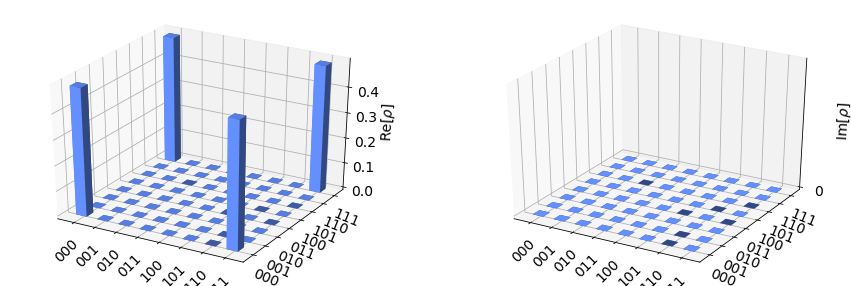

In [13]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)